In [1]:
import openai
import os
import pdfplumber

from rich import print, print_json

import pymupdf4llm



In [2]:
client = openai.OpenAI()  # Default to os.environ.get("OPENAI_API_KEY")


def query(msg):
    return client.chat.completions.create(
        model="gpt-4o",
        temperature=0,
        seed=213,
        messages=[{"role": "user", "content": msg}],
    ).choices[0].message.content

In [3]:
print(query("Hello test test"))

Hello! How can I assist you today?

In [4]:
fname = "../../data/example_docketsheets_courtsummaries/DS_MJ-26304-CR-0000183-2006.pdf"

pages = pdfplumber.open(fname).pages

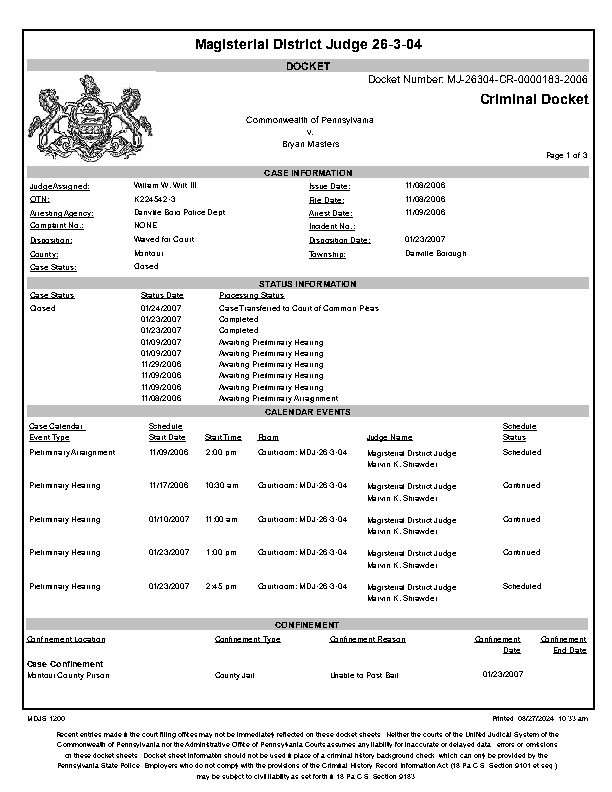

In [5]:
pages[0].to_image()

In [6]:
alltext = "\n".join([page.extract_text(keep_blank_chars=True, layout=True) for page in pages])

In [7]:
answer = query(f"""Below you find the text extracted from a court document. It contains multiple tables and information sections.
               Please extract as much information as you can from the text below and return it in an appropriate JSON structure:

                {alltext}""")

In [8]:
with open(fname.replace(".pdf", ".json"), "w") as f:
    f.write(answer)